In [77]:
import pandas as pd
import numpy as np
import sqlite3
from pandasql import sqldf

#load in data sets
boxoffice = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
movie_info = pd.read_table('zippedData/rt.movie_info.tsv.gz')
reviews = pd.read_table('zippedData/rt.reviews.tsv.gz', encoding='windows-1252')
movies = pd.read_csv('zippedData/tmdb.movies.csv.gz', index_col=0)
movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', index_col=0)

#connect to database
conn = sqlite3.connect('zippedData/im.db')

pysqldf = lambda q: sqldf(q, globals())



In [78]:
joined = pd.read_sql("SELECT * FROM movie_basics mb JOIN movie_ratings mr ON mb.movie_id=mr.movie_id", conn)

q = """SELECT * FROM joined j JOIN movie_budgets mb ON mb.movie=j.primary_title JOIN movies m ON m.original_title=j.original_title"""
master_df = pysqldf(q).drop_duplicates(subset='primary_title', keep='first')

new_master_df = master_df.drop(["original_title", "id", "start_year", "movie", "title", "genre_ids", "original_language"], axis=1)
new_master_df = new_master_df.rename(columns={"vote_average": "tmdb_vote_average",
                                              "vote_count": "tmdb_vote_count", "averagerating": "imdb_average_rating", "numvotes": "imdb_vote_count"})
new_master_df["genres"] = new_master_df["genres"].str.split(',')

new_master_df

,movie_id,primary_title,runtime_minutes,genres,imdb_average_rating,imdb_vote_count,release_date,production_budget,domestic_gross,worldwide_gross,popularity,release_date,tmdb_vote_average,tmdb_vote_count
0,tt0249516,Foodfight!,91.0,"[Action, Animation, Comedy]",1.9,8248,"Dec 31, 2012","$45,000,000",$0,"$73,706",4.705,2013-05-07,2.1,46
1,tt0326592,The Overnight,88.0,None,7.5,24,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996",6.576,2015-06-19,6.0,200
2,tt0337692,On the Road,124.0,"[Adventure, Drama, Romance]",6.1,37886,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302",8.919,2012-12-21,5.6,518
3,tt0359950,The Secret Life of Walter Mitty,114.0,"[Adventure, Comedy, Drama]",7.3,275300,"Dec 25, 2013","$91,000,000","$58,236,838","$187,861,183",10.743,2013-12-25,7.1,4859
4,tt0365907,A Walk Among the Tombstones,114.0,"[Action, Crime, Drama]",6.5,105116,"Sep 19, 2014","$28,000,000","$26,017,685","$62,108,587",19.373,2014-09-19,6.3,1685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2825,tt7401588,Instant Family,118.0,"[Comedy, Drama]",7.4,46728,"Nov 16, 2018","$48,000,000","$67,363,237","$119,736,188",22.634,2018-11-16,7.6,782
2839,tt7766254,Big,99.0,[Documentary],8.5,6,"Jun 3, 1988","$18,000,000","$114,968,774","$151,668,774",15.031,1988-06-03,7.0,1813
2841,tt7784604,Hereditary,127.0,"[Drama, Horror, Mystery]",7.3,151571,"Jun 8, 2018","$10,000,000","$44,069,456","$70,133,905",26.185,2018-06-08,7.0,2491
2848,tt8043306,Teefa in Trouble,155.0,"[Action, Comedy, Crime]",7.4,2724,"Jul 20, 2018","$1,500,000",$0,"$98,806",4.486,2018-07-20,7.6,11


In [79]:
new_master_df['domestic_gross'] = new_master_df['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(int)
new_master_df['production_budget'] = new_master_df['production_budget'].str.replace(',', '').str.replace('$', '').astype(int)
new_master_df['worldwide_gross'] = new_master_df['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(int)
final_master_df = new_master_df
final_master_df

C:\Users\zzwerling\AppData\Local\Temp\ipykernel_19132\2560155893.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  new_master_df['domestic_gross'] = new_master_df['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(int)
C:\Users\zzwerling\AppData\Local\Temp\ipykernel_19132\2560155893.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  new_master_df['production_budget'] = new_master_df['production_budget'].str.replace(',', '').str.replace('$', '').astype(int)
C:\Users\zzwerling\AppData\Local\Temp\ipykernel_19132\2560155893.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular e

,movie_id,primary_title,runtime_minutes,genres,imdb_average_rating,imdb_vote_count,release_date,production_budget,domestic_gross,worldwide_gross,popularity,release_date,tmdb_vote_average,tmdb_vote_count
0,tt0249516,Foodfight!,91.0,"[Action, Animation, Comedy]",1.9,8248,"Dec 31, 2012",45000000,0,73706,4.705,2013-05-07,2.1,46
1,tt0326592,The Overnight,88.0,None,7.5,24,"Jun 19, 2015",200000,1109808,1165996,6.576,2015-06-19,6.0,200
2,tt0337692,On the Road,124.0,"[Adventure, Drama, Romance]",6.1,37886,"Mar 22, 2013",25000000,720828,9313302,8.919,2012-12-21,5.6,518
3,tt0359950,The Secret Life of Walter Mitty,114.0,"[Adventure, Comedy, Drama]",7.3,275300,"Dec 25, 2013",91000000,58236838,187861183,10.743,2013-12-25,7.1,4859
4,tt0365907,A Walk Among the Tombstones,114.0,"[Action, Crime, Drama]",6.5,105116,"Sep 19, 2014",28000000,26017685,62108587,19.373,2014-09-19,6.3,1685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2825,tt7401588,Instant Family,118.0,"[Comedy, Drama]",7.4,46728,"Nov 16, 2018",48000000,67363237,119736188,22.634,2018-11-16,7.6,782
2839,tt7766254,Big,99.0,[Documentary],8.5,6,"Jun 3, 1988",18000000,114968774,151668774,15.031,1988-06-03,7.0,1813
2841,tt7784604,Hereditary,127.0,"[Drama, Horror, Mystery]",7.3,151571,"Jun 8, 2018",10000000,44069456,70133905,26.185,2018-06-08,7.0,2491
2848,tt8043306,Teefa in Trouble,155.0,"[Action, Comedy, Crime]",7.4,2724,"Jul 20, 2018",1500000,0,98806,4.486,2018-07-20,7.6,11


In [80]:
final_master_df['domestic_profit'] = final_master_df['domestic_gross'] - final_master_df['production_budget']
final_master_df['worldwide_profit'] = final_master_df['worldwide_gross'] - final_master_df['production_budget']
final_master_df

,movie_id,primary_title,runtime_minutes,genres,imdb_average_rating,imdb_vote_count,release_date,production_budget,domestic_gross,worldwide_gross,popularity,release_date,tmdb_vote_average,tmdb_vote_count,domestic_profit,worldwide_profit
0,tt0249516,Foodfight!,91.0,"[Action, Animation, Comedy]",1.9,8248,"Dec 31, 2012",45000000,0,73706,4.705,2013-05-07,2.1,46,-45000000,-44926294
1,tt0326592,The Overnight,88.0,None,7.5,24,"Jun 19, 2015",200000,1109808,1165996,6.576,2015-06-19,6.0,200,909808,965996
2,tt0337692,On the Road,124.0,"[Adventure, Drama, Romance]",6.1,37886,"Mar 22, 2013",25000000,720828,9313302,8.919,2012-12-21,5.6,518,-24279172,-15686698
3,tt0359950,The Secret Life of Walter Mitty,114.0,"[Adventure, Comedy, Drama]",7.3,275300,"Dec 25, 2013",91000000,58236838,187861183,10.743,2013-12-25,7.1,4859,-32763162,96861183
4,tt0365907,A Walk Among the Tombstones,114.0,"[Action, Crime, Drama]",6.5,105116,"Sep 19, 2014",28000000,26017685,62108587,19.373,2014-09-19,6.3,1685,-1982315,34108587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2825,tt7401588,Instant Family,118.0,"[Comedy, Drama]",7.4,46728,"Nov 16, 2018",48000000,67363237,119736188,22.634,2018-11-16,7.6,782,19363237,71736188
2839,tt7766254,Big,99.0,[Documentary],8.5,6,"Jun 3, 1988",18000000,114968774,151668774,15.031,1988-06-03,7.0,1813,96968774,133668774
2841,tt7784604,Hereditary,127.0,"[Drama, Horror, Mystery]",7.3,151571,"Jun 8, 2018",10000000,44069456,70133905,26.185,2018-06-08,7.0,2491,34069456,60133905
2848,tt8043306,Teefa in Trouble,155.0,"[Action, Comedy, Crime]",7.4,2724,"Jul 20, 2018",1500000,0,98806,4.486,2018-07-20,7.6,11,-1500000,-1401194


Data analysis brainstorming:
- How genre impacts profitability of a movie
- Does higher rating mean more profitability
- How does runtime impact profitability
- How does budget impact profit margins (does a higher budget lead to a higher or lower profit margin on average?)

In [81]:
movies[movies["original_title"] == "The Secret Life of Walter Mitty"]

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
7998,"[12, 35, 18, 14]",116745,en,The Secret Life of Walter Mitty,10.743,2013-12-25,The Secret Life of Walter Mitty,7.1,4859


In [82]:
#get correlation between runtime and profit:
runtime = final_master_df['runtime_minutes'].corr(final_master_df['worldwide_profit'])
runtime

#slightly positive correlation between movie length and the amount of profit

0.28940321609712916

In [83]:
#get movies with at least 1000 votes
movies_1000_votes = final_master_df[(final_master_df['imdb_vote_count'] > 1000)]
movies_1000_votes

,movie_id,primary_title,runtime_minutes,genres,imdb_average_rating,imdb_vote_count,release_date,production_budget,domestic_gross,worldwide_gross,popularity,release_date,tmdb_vote_average,tmdb_vote_count,domestic_profit,worldwide_profit
0,tt0249516,Foodfight!,91.0,"[Action, Animation, Comedy]",1.9,8248,"Dec 31, 2012",45000000,0,73706,4.705,2013-05-07,2.1,46,-45000000,-44926294
2,tt0337692,On the Road,124.0,"[Adventure, Drama, Romance]",6.1,37886,"Mar 22, 2013",25000000,720828,9313302,8.919,2012-12-21,5.6,518,-24279172,-15686698
3,tt0359950,The Secret Life of Walter Mitty,114.0,"[Adventure, Comedy, Drama]",7.3,275300,"Dec 25, 2013",91000000,58236838,187861183,10.743,2013-12-25,7.1,4859,-32763162,96861183
4,tt0365907,A Walk Among the Tombstones,114.0,"[Action, Crime, Drama]",6.5,105116,"Sep 19, 2014",28000000,26017685,62108587,19.373,2014-09-19,6.3,1685,-1982315,34108587
5,tt0369610,Jurassic World,124.0,"[Action, Adventure, Sci-Fi]",7.0,539338,"Jun 12, 2015",215000000,652270625,1648854864,20.709,2015-06-12,6.6,14056,437270625,1433854864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2824,tt7388562,"Paul, Apostle of Christ",108.0,"[Adventure, Biography, Drama]",6.7,5662,"Mar 23, 2018",5000000,17547999,25529498,12.005,2018-03-28,7.1,98,12547999,20529498
2825,tt7401588,Instant Family,118.0,"[Comedy, Drama]",7.4,46728,"Nov 16, 2018",48000000,67363237,119736188,22.634,2018-11-16,7.6,782,19363237,71736188
2841,tt7784604,Hereditary,127.0,"[Drama, Horror, Mystery]",7.3,151571,"Jun 8, 2018",10000000,44069456,70133905,26.185,2018-06-08,7.0,2491,34069456,60133905
2848,tt8043306,Teefa in Trouble,155.0,"[Action, Comedy, Crime]",7.4,2724,"Jul 20, 2018",1500000,0,98806,4.486,2018-07-20,7.6,11,-1500000,-1401194


In [84]:
rating_profit = movies_1000_votes['imdb_average_rating'].corr(movies_1000_votes['worldwide_profit'])
rating_profit
#slightly positive correlation between rating and profit for movies with min 1000 votes

0.27219355472271334

In [85]:
popularity = final_master_df['popularity'].corr(final_master_df['worldwide_profit'])
popularity
#moderately positive correlation between popularity and worldwide profit

0.5973791629407421

In [86]:
#explode table based on genres
final = final_master_df
final = final.drop(['release_date'], axis=1)
final['genres'] = final['genres'].dropna()
final = final.dropna()
final.reset_index(drop=True)
final = final.explode('genres')


C:\Users\zzwerling\AppData\Local\Temp\ipykernel_19132\3137294709.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  comedy = final[final['genres'] == 'Comedy'].mean()
C:\Users\zzwerling\AppData\Local\Temp\ipykernel_19132\3137294709.py:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  action = final[final['genres'] == 'Action'].mean()
C:\Users\zzwerling\AppData\Local\Temp\ipykernel_19132\3137294709.py:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. 

Text(0.5, 1.0, 'Mean worldwide profit for different genres of movies (hundreds of millions)')

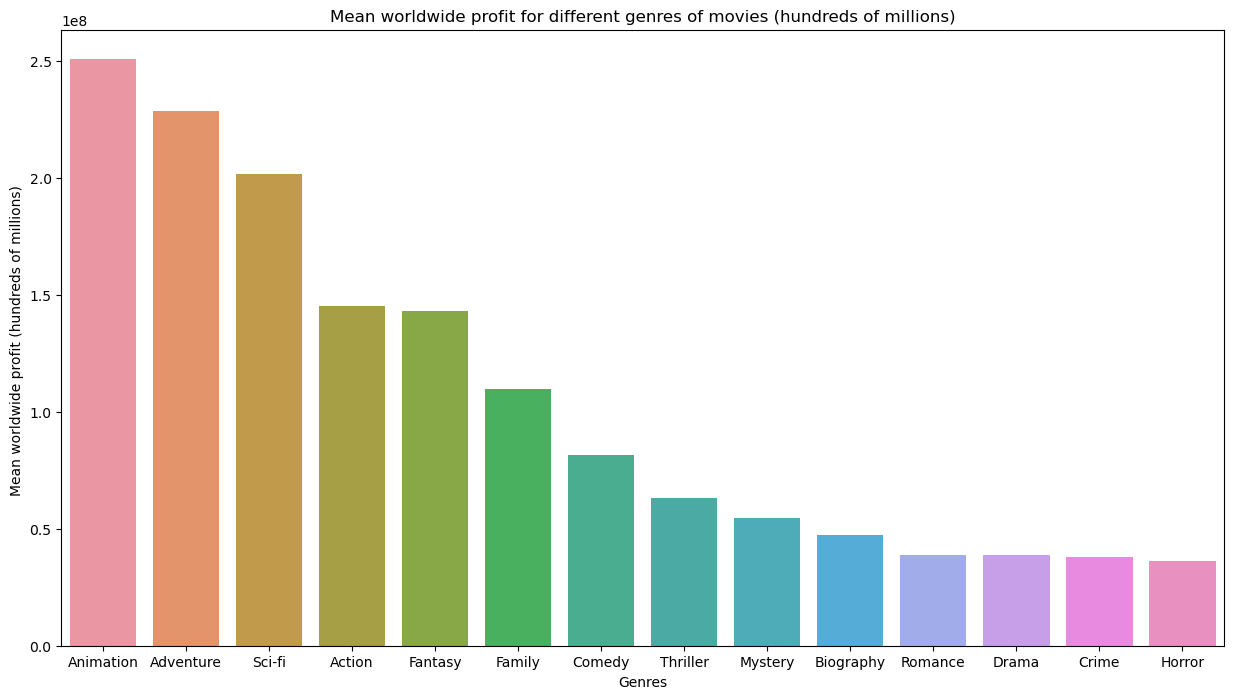

In [132]:
import seaborn as sns
from matplotlib import pyplot as plt

#get mean of different movies

comedy = final[final['genres'] == 'Comedy'].mean()
action = final[final['genres'] == 'Action'].mean()
animation = final[final['genres'] == 'Animation'].mean()
drama = final[final['genres'] == 'Drama'].mean()
horror = final[final['genres'] == 'Horror'].mean()
mystery = final[final['genres'] == 'Mystery'].mean()
scifi = final[final['genres'] == 'Sci-Fi'].mean()
adventure = final[final['genres'] == 'Adventure'].mean()
romance = final[final['genres'] == 'Romance'].mean()
thriller = final[final['genres'] == 'Thriller'].mean()
crime = final[final['genres'] == 'Crime'].mean()
biography = final[final['genres'] == 'Biography'].mean()
fantasy = final[final['genres'] == 'Fantasy'].mean() 
family = final[final['genres'] == 'Family'].mean()


#create dictionary
genre_profit = {"Comedy":comedy, "Action": action, "Animation": animation, "Drama": drama, "Horror": horror,
               "Mystery": mystery, "Sci-fi": scifi, "Adventure": adventure, "Romance": romance, "Thriller": thriller, 
                "Crime": crime, "Biography": biography, "Fantasy": fantasy, "Family": family}

#create dataframe from dictionary
mean_df = pd.DataFrame(genre_profit)

#get worldwide profit & sort and prepare for graph
genres = mean_df.iloc[[10]]
genres = genres.T.sort_values("worldwide_profit", ascending=False)
genres = genres.reset_index()

#graph data
plt.figure(figsize=(15, 8))
sns.barplot(x="index", y="worldwide_profit", data=genres)
plt.xlabel('Genres')
plt.ylabel('Mean worldwide profit (hundreds of millions) ')
plt.title('Mean worldwide profit for different genres of movies (hundreds of millions)')